In [1]:
using ITensors, ITensorMPS
using LinearAlgebra
# using SparseArrays
using Plots
# using JLD2

In [2]:
include("../src/main.jl")
include("../src/observables.jl")
include("../src/states.jl")
include("../src/doubled_measurements.jl")
include("../src/singled_measurements.jl")
include("../src/circuits.jl")

pure_sample (generic function with 1 method)

In [ ]:
# data = Dict{Tuple{Int,Int,Float64,Float64,Float64},Tuple{Dict,Dict}}()

Dict{Tuple{Int64, Int64, Float64, Float64, Float64}, Tuple{Dict, Dict}}()

In [51]:
observables = [:pure_SR, :terminal_order, :terminal_disorder]
L = 12
T = 2L
δ = 0.7
q = 0.0
θ = 0.2
samples = 200

for λ in [0.6]
    means, vars = pure_sample(L, T, λ, δ, θ, θ, samples; PBC=true, ref=true, final_perfect=false, observables=observables)
    data[(L,T,λ,δ,θ)] = (means,vars)
end

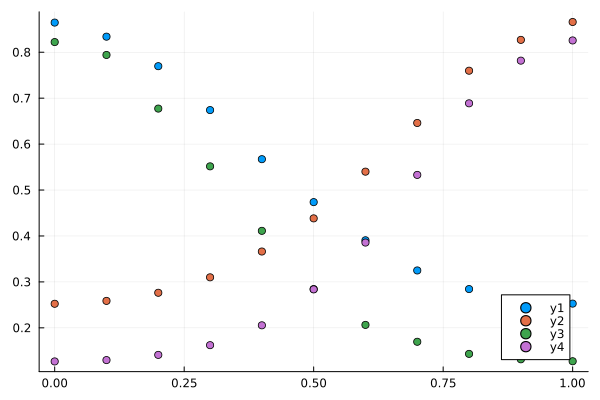

In [28]:


δ = 0.7
q = 0.0
θ = 0.2
samples = 500

plt = plot()

for L in 4:4:8
    T = 2L
    xs = 0.0:0.1:1.0
    order1 = real.([data[(L,T,λ,δ,θ)][1][:terminal_order][2T] for λ in xs])
    order2 = real.([data[(L,T,λ,δ,θ)][1][:terminal_order][2T+1] for λ in xs])
    plot!(plt, xs, (order1+order2)/(2L), seriestype=:scatter)

    disorder1 = real.([data[(L,T,λ,δ,θ)][1][:terminal_disorder][2T] for λ in xs])
    disorder2 = real.([data[(L,T,λ,δ,θ)][1][:terminal_disorder][2T+1] for λ in xs])
    plot!(plt, xs, (disorder1+disorder2)/(2L), seriestype=:scatter)
end
plt

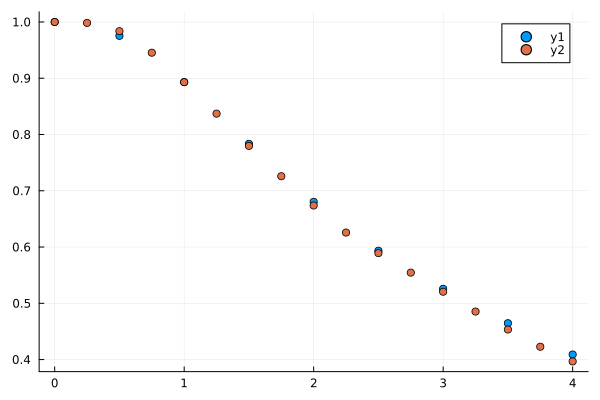

In [49]:


δ = 0.7
q = 0.0
θ = 0.2
λ = 0.6
samples = 500

plt = plot()

for L in 4:4:8
    T = 2L
    xs = collect(0:2:2T+1)
    ys1 = real.(data[(L,T,λ,δ,θ)][1][:pure_SR][1:2:end])
    ys2 = real.(data[(L,T,λ,δ,θ)][1][:pure_SR][2:2:end])
    plot!(plt, xs/L, (ys1+ys2)/2, seriestype=:scatter)

end
plt

In [41]:
L = 8
T = 2L
real.(data[(L,T,λ,δ,θ)][1][:pure_SR][1:end])

34-element Vector{Float64}:
 1.0
 1.0
 1.0
 0.9967034179923007
 0.9949673507636402
 0.9723697317246575
 0.9663668195381158
 0.9244722799416919
 0.9178675698244421
 0.8681133369320584
 ⋮
 0.5051973751788993
 0.4992778177134294
 0.47133489012486446
 0.46616050215294197
 0.4405992092491386
 0.4334644359754406
 0.412142623951026
 0.4061967121697475
 0.38712630968893275

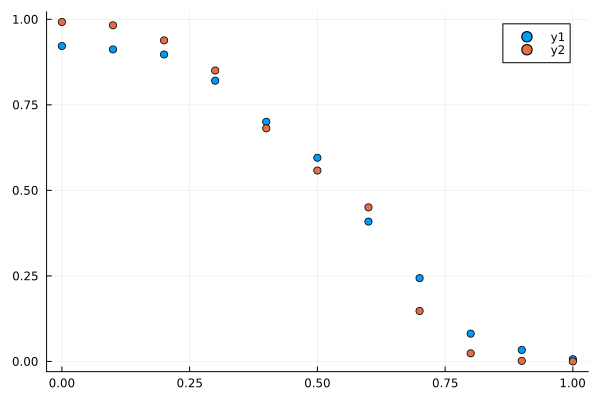

In [29]:


δ = 0.7
q = 0.0
θ = 0.2
samples = 500

plt = plot()

for L in 4:4:8
    T = 2L
    xs = 0.0:0.1:1.0
    ys = real.([data[(L,T,λ,δ,θ)][1][:pure_SR][2T+1] for λ in xs])
    plot!(plt, xs, ys, seriestype=:scatter)

end
plt

In [7]:
means[:pure_SR]

18-element Vector{ComplexF64}:
                1.0 + 0.0im
                1.0 + 0.0im
                1.0 + 0.0im
 0.9834382706211591 + 0.0im
 0.9623365241238696 + 0.0im
 0.9306864916330099 + 0.0im
 0.8992689435050168 + 0.0im
 0.8623351401410667 + 0.0im
 0.8190110239619308 + 0.0im
  0.791849816104272 + 0.0im
 0.7909997793727288 + 0.0im
 0.7604491210179186 + 0.0im
 0.7269052630895046 + 0.0im
 0.6955190927521577 + 0.0im
 0.6838950164732271 + 0.0im
  0.663613653038603 + 0.0im
 0.6527364480523888 + 0.0im
  0.636961200733367 + 0.0im

In [6]:
means[:terminal_order]

18-element Vector{ComplexF64}:
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 2.2438710157749564 - 2.746226940077479e-18im
 1.3910256421390812 + 1.796453039847353e-18im
 2.3715713243466636 - 1.0480288264353242e-18im
 1.4012913857578793 + 1.432133413822893e-18im